In [13]:
# Importação das bibliotecas necessárias
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [14]:
# Leitura do arquivo CSV que contém os dados do cliente para análise de crédito
df = pd.read_csv('solicitacoescredito.csv')

## Filtro das colunas para melhorar a precisão do nosso modelo

In [15]:
# Seleção das colunas mais importantes para a análise de crédito
# Essas colunas podem conter informações sobre o risco de crédito e comportamento financeiro
colunas_importantes = [
    "maiorAtraso",  # Tempo de maior atraso nos pagamentos
    "margemBrutaAcumulada",  # Margem bruta acumulada da empresa
    "percentualProtestos",  # Percentual de protestos financeiros contra a empresa
    "prazoMedioRecebimentoVendas",  # Prazo médio de recebimento das vendas
    "titulosEmAberto",  # Títulos financeiros ainda em aberto
    "valorSolicitado",  # Valor de crédito solicitado pela empresa
    "status",  # Status atual da solicitação de crédito
    "definicaoRisco",  # Definição do risco atribuída à empresa
    "percentualRisco",  # Percentual de risco associado à empresa
    "valorAprovado",  # Valor de crédito aprovado
    "endividamento",  # Nível de endividamento da empresa
    "faturamentoBruto",  # Faturamento bruto da empresa
    "limiteEmpresaAnaliseCredito",  # Limite de crédito atribuído pela análise
    "restricoes",  # Restrições financeiras da empresa
    "scorePontualidade"  # Pontuação de pontualidade de pagamento
]

In [16]:
# Filtragem do DataFrame para manter apenas as colunas importantes e remoção de dados ausentes
df_filtrado = df[colunas_importantes]
df_filtrado = df_filtrado.dropna()

In [17]:
# Codificação de variáveis categóricas para numéricas usando LabelEncoder
# O 'status' e 'definicaoRisco' são convertidos para números
le_status = LabelEncoder()
le_definicaoRisco = LabelEncoder()

df_filtrado['status'] = le_status.fit_transform(df_filtrado['status'])
df_filtrado['definicaoRisco'] = le_definicaoRisco.fit_transform(df_filtrado['definicaoRisco'])

In [18]:
# Pré-processamento dos dados: Normalização
# Os dados são normalizados para que todas as variáveis tenham a mesma escala,
# evitando que variáveis com maiores magnitudes dominem o modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtrado.dropna())

In [26]:
# Definição da faixa de valores de K (número de clusters) para análise
range_n_clusters = range(2, 20)  # Vamos testar K de 2 até 10

In [27]:
# Lista para armazenar os scores de silhueta para diferentes valores de K
silhouette_scores = []

In [28]:
# Loop para aplicar K-Means e calcular o Silhouette Score para cada valor de K
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, o Silhouette Score é {silhouette_avg}")

Para n_clusters = 2, o Silhouette Score é 0.5137630994550211
Para n_clusters = 3, o Silhouette Score é 0.3914636999494474
Para n_clusters = 4, o Silhouette Score é 0.24289147826565186
Para n_clusters = 5, o Silhouette Score é 0.2507798699899115
Para n_clusters = 6, o Silhouette Score é 0.2667165184588257
Para n_clusters = 7, o Silhouette Score é 0.2687431189518603
Para n_clusters = 8, o Silhouette Score é 0.24604318861633015
Para n_clusters = 9, o Silhouette Score é 0.25389094299505316
Para n_clusters = 10, o Silhouette Score é 0.2562247851537926
Para n_clusters = 11, o Silhouette Score é 0.2680192946619014
Para n_clusters = 12, o Silhouette Score é 0.27441733267815077
Para n_clusters = 13, o Silhouette Score é 0.27626637900075324
Para n_clusters = 14, o Silhouette Score é 0.277542624970037
Para n_clusters = 15, o Silhouette Score é 0.2830083045322909
Para n_clusters = 16, o Silhouette Score é 0.2517026819208112
Para n_clusters = 17, o Silhouette Score é 0.25276061283599155
Para n_clus

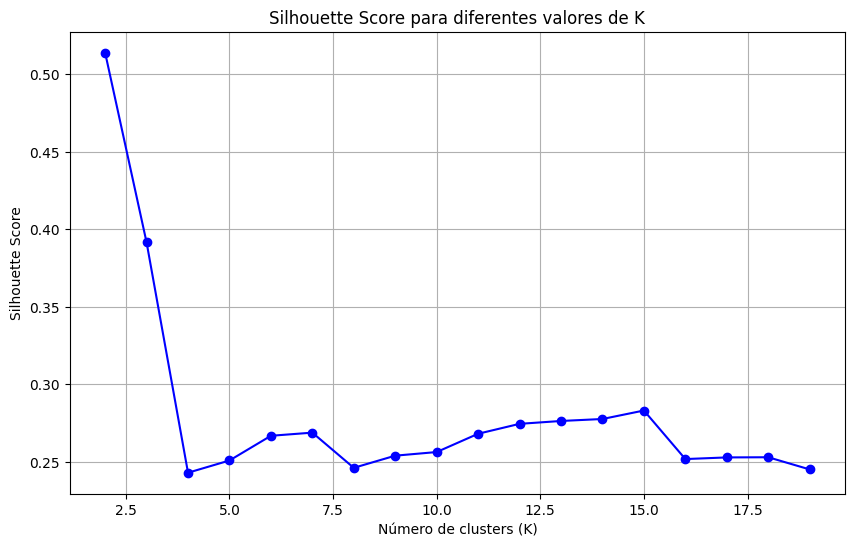

In [29]:
# Gráfico para mostrar o Silhouette Score em função de K
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score para diferentes valores de K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [33]:
# Divisão dos dados em treino e teste para classificação usando KNN
# Aqui, 80% dos dados são usados para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_filtrado['cluster'], test_size=0.2, random_state=42)

In [34]:
# Treinamento do modelo KNN com 5 vizinhos para classificar novos clientes
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
# Avaliação do modelo KNN com a acurácia nos dados de teste
accuracy = knn.score(X_test, y_test)
print(f"Acurácia do KNN: {accuracy}")

Acurácia do KNN: 0.9863760217983651


In [37]:
# Evitar que pandas mostre os números em notação científica
pd.set_option('display.float_format', '{:.2f}'.format)

# Cálculo da média do limite de crédito por cluster
cluster_limits = df_filtrado.groupby('cluster')['limiteEmpresaAnaliseCredito'].mean()

# Exibir os valores completos (sem notação científica)
print(cluster_limits)

cluster
0    1102259.21
1   14912016.34
2    2556540.10
Name: limiteEmpresaAnaliseCredito, dtype: float64
